In [4]:
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


/home/joel/.local/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.24.3) or chardet (2.1.1) doesn't match a supported version!
  RequestsDependencyWarning)


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')

In [7]:
from astroquery.gaia import Gaia
tables = Gaia.load_tables(only_names=True)
for table in (tables):
    print (table.get_qualified_name())

Retrieving tables...
Parsing tables...
Done.
external.external.apassdr9
external.external.gaiadr2_geometric_distance
external.external.ravedr5_com
external.external.ravedr5_dr5
external.external.ravedr5_gra
external.external.ravedr5_on
external.external.sdssdr13_photoprimary
external.external.skymapperdr1_master
external.external.tmass_xsc
public.public.hipparcos
public.public.hipparcos_newreduction
public.public.hubble_sc
public.public.igsl_source
public.public.igsl_source_catalog_ids
public.public.tycho2
public.public.dual
tap_config.tap_config.coord_sys
tap_schema.tap_schema.columns
tap_schema.tap_schema.key_columns
tap_schema.tap_schema.keys
tap_schema.tap_schema.schemas
tap_schema.tap_schema.tables
gaiadr1.gaiadr1.aux_qso_icrf2_match
gaiadr1.gaiadr1.ext_phot_zero_point
gaiadr1.gaiadr1.allwise_best_neighbour
gaiadr1.gaiadr1.allwise_neighbourhood
gaiadr1.gaiadr1.gsc23_best_neighbour
gaiadr1.gaiadr1.gsc23_neighbourhood
gaiadr1.gaiadr1.ppmxl_best_neighbour
gaiadr1.gaiadr1.ppmxl_neighb

In [8]:
# Now we are querying Gaia Data Release 2 aka "DR2" to get more stars and get the color (only in DR2)
job4 = Gaia.launch_job_async("SELECT * \
FROM gaiadr2.gaia_source \
WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',56.75,24.1167,2))=1 \
AND abs(pmra_error/pmra)<0.10 \
AND abs(pmdec_error/pmdec)<0.10 \
AND pmra IS NOT NULL AND abs(pmra)>0 \
AND pmdec IS NOT NULL AND abs(pmdec)>0 \
AND pmra BETWEEN 15 AND 25 \
AND pmdec BETWEEN -55 AND -40;", dump_to_file=True)

In [9]:
# Make a color-magnitude diagram (absolute G-band magnitude vs. BP-RP)
import numpy as np
m45cluster = job4.get_results() 
px = m45cluster["parallax"]
color = m45cluster["bp_rp"]
abs_Gmag = m45cluster["phot_g_mean_mag"] - (5.0 * np.log10(1./(px/1000.)) - 5.0)
app_Gmag = m45cluster["phot_g_mean_mag"] 

In [16]:
import datamatrix as dm

In [24]:
MS_color = [-0.037, 0.377, 0.82, 0.98,1.84,2.09,2.25,2.49,3.13,3.95,4.8]  #http://www.pas.rochester.edu/~emamajek/EEM_dwarf_UBVIJHK_colors_Teff.txt
MS_G = [1.09, 2.46, 4.65, 5.53,8.26,8.87,9.38,10.05,12.02,14.48,15.73]

MS_label = ['A0','F0','G2','K0','M0','M1','M2','M3','M4.5','M6','M8']

M_gj1243 = (11.55, 83.48)
M_gj1243 = 11.55
col_gj1243 = 2.83

M_yzcmi = (9.68, 167.019)
M_yzcmi = 9.68
col_yzcmi = 3.00

M_dtvir = (8.91, 86.85)
M_dtvir = 8.91
col_dtvir = 2.16

M_aumic =(7.84, 102.89)
M_aumic =7.84
col_aumic = 2.12

M_yygem = (8.32, 66.23)
M_yygem = 8.32
col_yygem = 1.94

M_9024 = (5.62, 7.169)
M_9024 = 5.62
col_9024 = 1.028

M_KIC11610797 = (11.456, 3.5796)
M_KIC11610797 = 11.456
col_KIC11610797 =0.773

M_KIC11551430a = (10.713, 3.056)
M_KIC11551430a = 10.713
col_KIC11551430a = 0.94

M_KIC11551430b = (12.62, 2.873)
M_KIC11551430b = 12.62
col_KIC11551430b = 0.88

pearl = (10.71, 3.056) # KIC11551430  ... lol this is the one above!
pearl = 10.71# KIC11551430  ... lol this is the one above!
col_pearl = 0.94

pearl2 = (12.62, 2.873) # KIC11551430
pearl2 = 12.62 # KIC11551430
col_pearl2 = 0.88

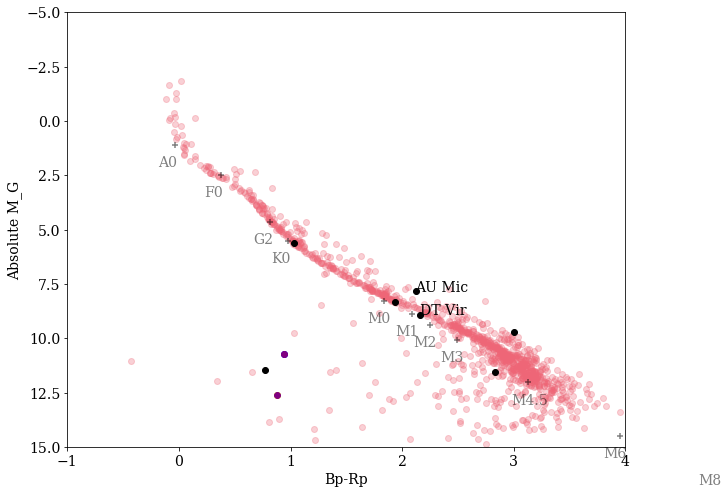

In [25]:
plt.rc('font', family='serif',size=14)
fig = plt.figure(figsize=(10,8))
plt.scatter(color, abs_Gmag, color='#EE6677', alpha=0.3)
plt.xlabel('Bp-Rp')
plt.ylabel('Absolute M_G')
plt.axis([-1,4,15,-5])
i = 0
while i < len(MS_color):
    plt.text(MS_color[i]-0.15,MS_G[i]+1, MS_label[i],alpha=0.5)
    i = i +1
plt.plot(col_gj1243, M_gj1243,marker='o',color='black')
plt.plot(col_dtvir, M_dtvir,marker='o',color='black')
plt.text(col_dtvir, M_dtvir, 'DT Vir')
plt.plot(col_aumic, M_aumic,marker='o',color='black')
plt.text(col_aumic, M_aumic, 'AU Mic')
plt.plot(col_yygem, M_yygem,marker='o',color='black')
plt.plot(col_yzcmi, M_yzcmi,marker='o',color='black')
plt.plot(col_9024, M_9024,marker='o',color='black')

plt.plot(col_KIC11610797, M_KIC11610797,marker='o',color='black')
plt.plot(col_KIC11551430a, M_KIC11551430a,marker='o',color='blue')
plt.plot(col_KIC11551430b, M_KIC11551430b,marker='o',color='yellow')
plt.plot(col_pearl, pearl,marker='o',color='purple')
plt.plot(col_pearl2, pearl2,marker='o',color='purple')
plt.scatter(MS_color, MS_G, color='black',marker='+',alpha=0.5)


In [26]:
import astropy.io.ascii as ascii
data = ascii.read('GaiaDR2_RevisedPassbands.dat')
wl = data['wl']
wl_a = wl * 10.0
#print(wl_a)
trans = data['G']
#print(trans)
import fwhm as fwhm
import numpy as np
print(np.max(trans))
test = fwhm.main(wl_a,trans,0.5, 0.0)
xx = np.linspace(0,9,10)
yy = np.zeros(10)
yy[0]=0.
yy[1]=8.5
yy[2]=10.
yy[3]=9.5
yy[4]=5.
yy[5]=4.
yy[6]=4.
yy[7]=9.
yy[8]=3.
yy[9]=1.0
#[0, 8.0, 10.0, 9.0, 8., 6, 5 ,4 ,3 ,1 ]
from scipy import interpolate
import numpy as np
y_baseline = 0.
y_shifted = yy - (yy.max()-y_baseline) * 0.5
x_curve = interpolate.UnivariateSpline(xx, y_shifted, s=0)
nroots = len(x_curve.roots())
roots = x_curve.roots()
print(roots)
maxind = yy.argmax()
print(maxind)
vals1 = np.all([roots < xx[maxind]],axis=0)
lenless = len(vals1)
vals2 = np.all([roots > xx[maxind]],axis=0)
print(min(roots[vals2]) - max(roots[vals1]))
#test = fwhm.main(xx,yy,0.5, 0.0)
#print(test)

FileNotFoundError: [Errno 2] No such file or directory: 'GaiaDR2_RevisedPassbands.dat'

In [3]:
print(len(test))

3
